In [60]:
import pandas as pd
from math import *
import numpy as np

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


#pickup dateNtime
#usd to inr

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df = df.dropna()

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(columns=['Unnamed: 0','key','pickup_datetime'])

In [9]:
df = df[df['fare_amount']!=0]

In [10]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [11]:
#to cal dis bet pickup and dropoff
def cal_dis(df):
    x1 = df['pickup_latitude']
    y1 = df['pickup_longitude']
    x2 = df['dropoff_latitude']
    y2 = df['dropoff_longitude']
    
    r = 6378.137

    lat1, lon1, lat2, lon2 = map(radians, [x1,y1,x2,y2]) #degree to radian
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2 
    c = 2 * atan2(sqrt(a), sqrt(1 - a))


    distance = r * c
    return distance

In [12]:
df['distance'] = df.apply(cal_dis,axis=1)

In [13]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.685208
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.460343
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.042019
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.663545
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.480464
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112336
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.877151
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.864714
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.543681


In [14]:
df['distance'].describe()

count    199994.000000
mean         20.835799
std         382.909671
min           0.000000
25%           1.216607
50%           2.123381
75%           3.879456
max       16427.621295
Name: distance, dtype: float64

In [15]:
df = df[df['distance']!=0]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

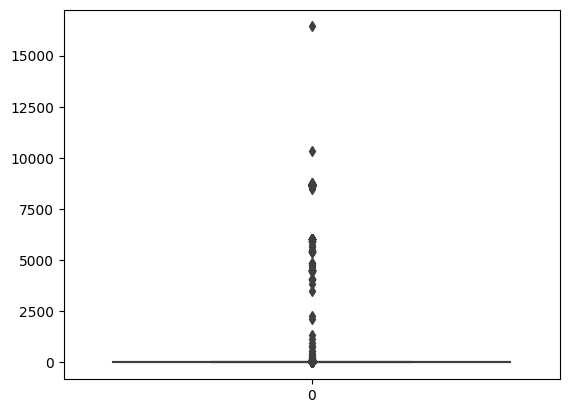

In [17]:
sns.boxplot(df['distance'])

In [18]:
df[df['distance']>10000]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
75851,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1,16427.621295
139447,13.7,-74.011042,40.709780,-73.983163,493.533332,4,10333.070148


In [19]:
df = df[df['distance']<10000]

<AxesSubplot:>

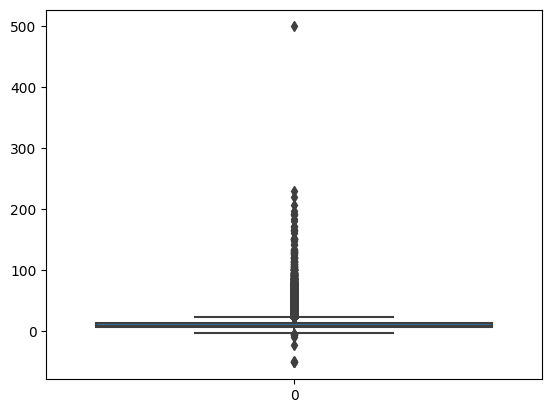

In [20]:
sns.boxplot(df['fare_amount'])

In [21]:
df[df['fare_amount']>400]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
170081,499.0,-73.968377,40.764602,-73.968368,40.7646,1,0.000791


In [22]:
df = df[df['fare_amount']<400]

<AxesSubplot:>

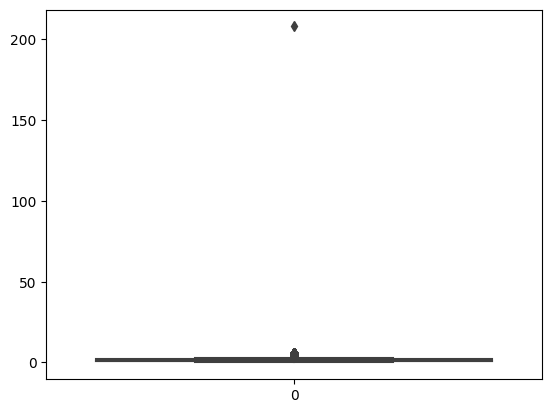

In [23]:
sns.boxplot(df['passenger_count'])

In [24]:
df = df[df['passenger_count']<150]

<AxesSubplot:>

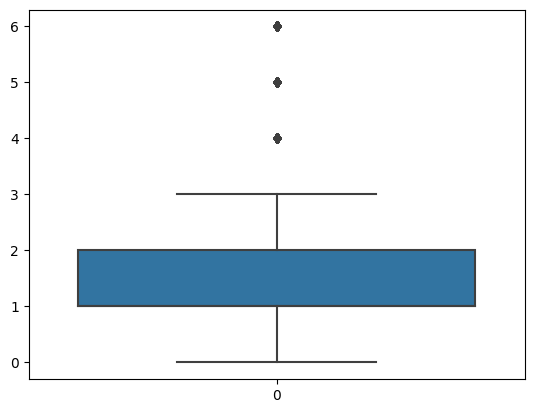

In [25]:
sns.boxplot(df['passenger_count'])

In [26]:
df[df['passenger_count']>5.5]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
145,38.54,-73.862762,40.768791,-73.978737,40.753040,6,9.934672
252,10.50,-73.981239,40.752876,-73.995277,40.726177,6,3.199296
390,4.50,-73.989575,40.758767,-73.969325,40.766030,6,1.889155
392,22.00,-73.978450,40.736707,-73.934902,40.810442,6,8.991726
416,5.00,-73.977120,40.745432,-73.974743,40.750415,6,0.589816
...,...,...,...,...,...,...,...
199796,9.00,-73.970375,40.761642,-73.980985,40.757700,6,0.996457
199876,11.30,-73.973325,40.748505,-74.004147,40.741472,6,2.714809
199890,7.00,-73.989767,40.725547,-74.002000,40.716875,6,1.413191
199893,6.00,-73.972245,40.749600,-73.984660,40.732842,6,2.139279


In [27]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.011006,-0.008096,0.012803,-0.012082,0.012454,0.025840
pickup_longitude,0.011006,1.000000,-0.413573,0.329369,-0.412313,0.004468,0.303320
pickup_latitude,-0.008096,-0.413573,1.000000,0.045240,0.062674,-0.006406,-0.208441
dropoff_longitude,0.012803,0.329369,0.045240,1.000000,-0.911792,0.004947,0.325141
dropoff_latitude,-0.012082,-0.412313,0.062674,-0.911792,1.000000,-0.007014,-0.233579
passenger_count,0.012454,0.004468,-0.006406,0.004947,-0.007014,1.000000,-0.001722
distance,0.025840,0.303320,-0.208441,0.325141,-0.233579,-0.001722,1.000000


<AxesSubplot:>

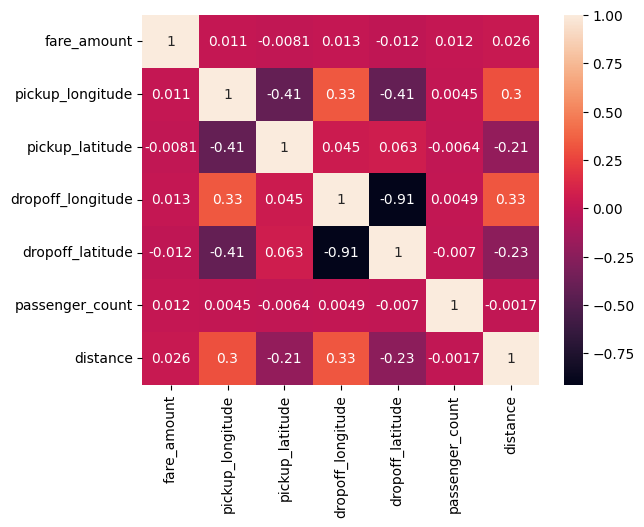

In [29]:
sns.heatmap(df.corr(),annot=True)

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['distance'] = sc.fit_transform(df[['distance']])
df['passenger_count'] = sc.fit_transform(df[['passenger_count']])

In [53]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.166667,0.000192
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.166667,0.000280
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.166667,0.000573
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.500000,0.000189
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.833333,0.000510
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,0.166667,0.000013
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,0.166667,0.000213
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,0.333333,0.001463
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,0.166667,0.000403


In [54]:
x = df[['distance','passenger_count']]
y = df['fare_amount']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [57]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred = linear_model.predict(x_test)

In [58]:
from sklearn.metrics import r2_score,mean_squared_error

In [62]:
print("R2 score is : ",r2_score(y_test,pred))
print("RMSE score is : ",np.sqrt(mean_squared_error(y_test,pred)))

R2 score is :  0.0006357051791916479
RMSE score is :  9.70815904173019


In [63]:
rfe = RandomForestRegressor()
rfe.fit(x_train,y_train)
pred = rfe.predict(x_test)
print("R2 score is : ",r2_score(y_test,pred))
print("RMSE score is : ",np.sqrt(mean_squared_error(y_test,pred)))

R2 score is :  0.7250571982815996
RMSE score is :  5.092090866994292
